In [1]:
import nbsetup
import scipy as sp
import ensemblepy as ep
import numpy as np
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt

In [30]:
ep.Collection([[10,0],[5,5]]).incoherence

0.6539033398467915

In [27]:
def create_data(funcs):
    analysis = []
    for name, (func, raunge) in funcs.items():
        for x in raunge:
            data = func(x)
            d = ep.Collection(data).comparison()
            d['func'] = name
            d['x'] = x
            analysis.append(d)
    return pd.DataFrame(analysis)

def plotit(df, sharex=False):
    uniques = df['func'].unique()
    
    fig, ax = plt.subplots(len(uniques), 2, figsize=(9,11), sharex=False, gridspec_kw={'width_ratios': [2, 1]})
    #plt.subplots_adjust(hspace = 0.3, wspace=0.2)
    plt.tight_layout(h_pad=2.2)
    for i, f in enumerate(uniques):
        df['i2'] = df['incoherence']**2
        df['jsd2'] = df['jsd']**0.5
        udf = df[df['func']==f]
        first = sns.lineplot(x=udf['x'], y=udf['incoherence'], ax=ax[i][0], label='Incoherence', legend=i==0, color='purple')
        sns.lineplot(x=udf['x'], y=udf['i2'], ax=ax[i][0], label='Incoherence^2', legend=i==0, color='purple', linestyle='dashed')
        sns.lineplot(x=udf['x'], y=udf['jsd'], ax=ax[i][0], label='Jensen-Shannon Divergence', legend=i==0, linestyle='dashed', color='red')
        sns.lineplot(x=udf['x'], y=udf['chi2 p'], ax=ax[i][0], label='Chi^2 p-value', legend=i==0, linestyle='dotted', color='green')
        sns.lineplot(x=udf['x'], y=udf['radial'], ax=ax[i][0], label='Mean Radial Divergence', legend=i==0, linestyle='dotted', color='red')

        first.set(xlabel=f, ylabel=None, ylim=(-0.1,max(1.1, udf['jsd'].max())))
        if i == 0: first.legend(ncol=2)
        sns.lineplot(x=udf['x'], y=udf['kl'], ax=ax[i][1], label='Mean KL Divergence', legend=i==0, linestyle='dashed', color='black')
        second = sns.lineplot(x=udf['x'], y=udf['chi2'], ax=ax[i][1], label='Chi^2 value', legend=i==0, color='green')
        second.set(ylim=(-0.05,None), ylabel=None, xlabel=None)
        
    return fig


The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


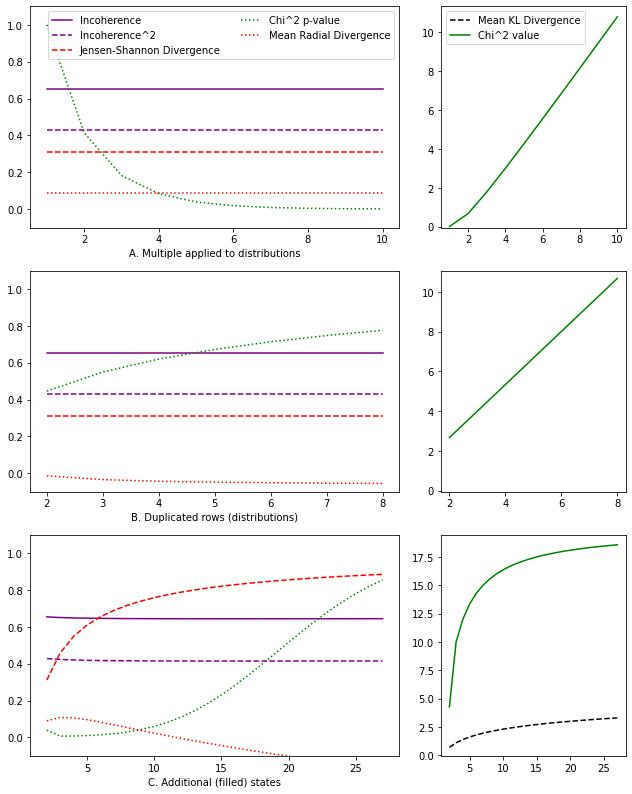

In [28]:
def points(x):
    return [[x,x], [0,2*x]]


def norm(data):
    for i, row in enumerate(data):
        data[i] = row/np.sum(row)
    return np.array(data)

def half_ensembles(x):
    rows = []
    for i in range(x):
        rows.append([1,1])
        rows.append([2,0])
    return norm(rows)*2

def filled_states(x):
    a = np.zeros(x)
    a[0] = 1
    b = np.ones(x)
    return norm([a,b])*10

plotit(create_data({
    'A. Multiple applied to distributions': (points, range(1,11)),
    'B. Duplicated rows (distributions)': (half_ensembles, range(2,9)),
    'C. Additional (filled) states': (filled_states, range(2,28)),
}), True).savefig('discrete-invariant.eps')

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


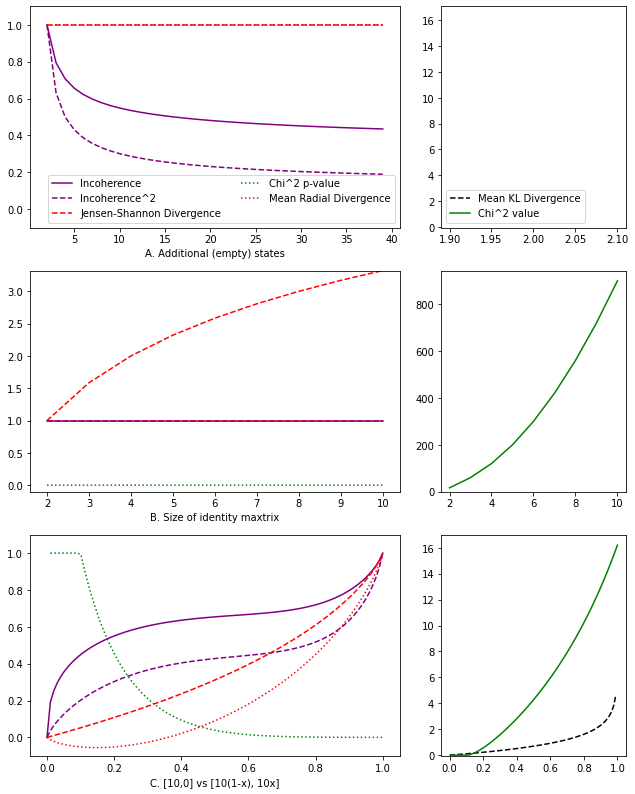

In [29]:
def full_range(x):
    return norm([[1,0], [(1-x),x]])*10

def outlier_states(x):
    a = np.ones(10)
    b = np.ones(10)
    return norm([a, b])*10

def outlier_dists(x):
    rows = [[1, 1] for _ in range(x)]
    rows.append([0, 1])
    return norm(rows)*10

def empty_states(x):
    a = np.zeros(x)
    a[0] = 1
    b = np.zeros(x)
    b[1] = 1
    return norm([a,b])*10

def maximum_inc(x):
    return np.identity(x)*10

plotit(create_data({
    'A. Additional (empty) states': (empty_states, range(2,40)),
    'B. Size of identity maxtrix': (maximum_inc, range(2,11)),
    'C. [10,0] vs [10(1-x), 10x]': (full_range, np.linspace(0,1.0,100)),
})).savefig('discrete-compare.eps')